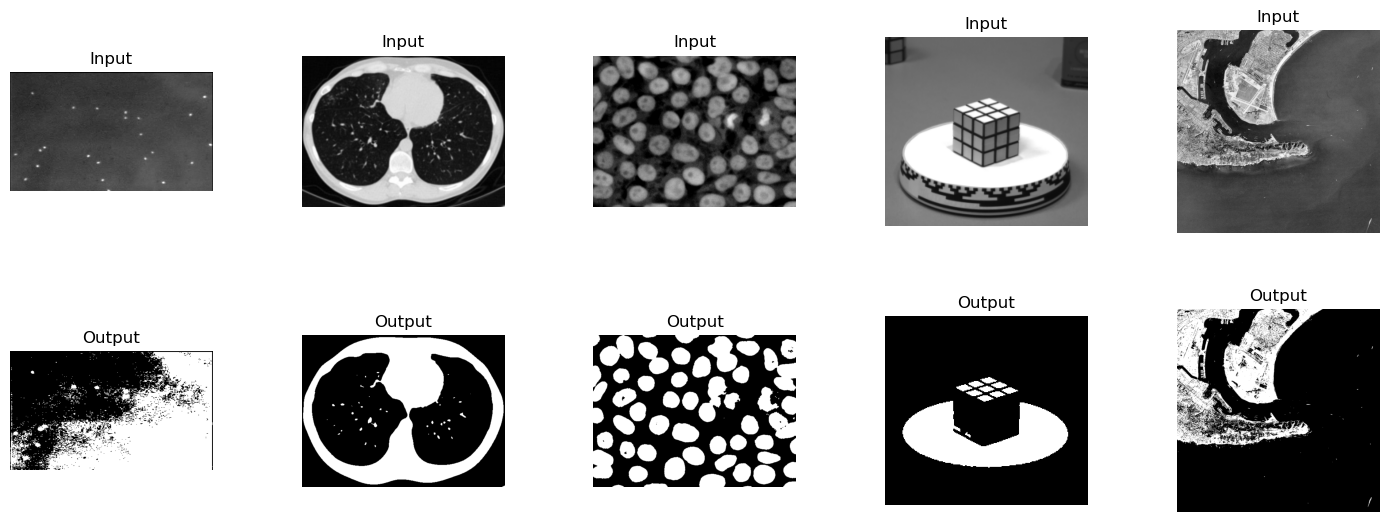

In [79]:
#  Q1

import cv2
import numpy as np
import matplotlib.pyplot as plt

# Referenced form lecture "Image Processing Part 1" slides pages 15-16
def otsu_threshold(image):
    # image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # histogram of image
    hist = cv2.calcHist([gray], [0], None, [256], [0, 256])
    hist = hist.flatten()
    
    total = gray.shape[0] * gray.shape[1]
    s_total = 0
    s_bg = 0
    w_total = 0
    max_var = 0
    o_threshold = 0
    
    for t in range(256):
        w_bg = np.sum(hist[:t]) / total
        w_fg = 1 - w_bg
        
        if w_bg > 0 and w_fg > 0:
            s_bg = 0
            for x in range(t):
                s_bg += x * hist[x]
                
            s_total = 0
            for x in range(256):
                s_total += x * hist[x]
            
            mean_bg = s_bg / (w_bg * total)
            mean_fg = (s_total - s_bg) / (w_fg * total)
            
            var = w_bg * w_fg * (mean_bg - mean_fg) ** 2
            
            if var > max_var:
                max_var = var
                o_threshold = t
        
#         if t % 50 == 0:
#             for _ in range(3):
#                 if t < 100:
#                     print("less < 100")
#                 else:
#                     print("greater >= 100")
    
    binary = gray > o_threshold
    binary = binary.astype(np.uint8) * 255
    
    return binary

# input image
input_paths = ['Algae.png', 'CT.png', 'Nuclei.png', 'Rubik.png', 'Satellite.png']
inputs = [cv2.imread(path) for path in input_paths]
outputs_otsu = [otsu_threshold(image) for image in inputs]

fig, axs = plt.subplots(2, len(inputs), figsize=(15, 6))
fig.tight_layout(pad=3.0)

# Output display
for i, (input_img, output_img) in enumerate(zip(inputs, outputs)):
    axs[0, i].imshow(cv2.cvtColor(input_img, cv2.COLOR_BGR2RGB))
    axs[0, i].set_title('Input')
    axs[0, i].axis('off')
    axs[1, i].imshow(output_img, cmap='gray')
    axs[1, i].set_title('Output')
    axs[1, i].axis('off')

plt.show()


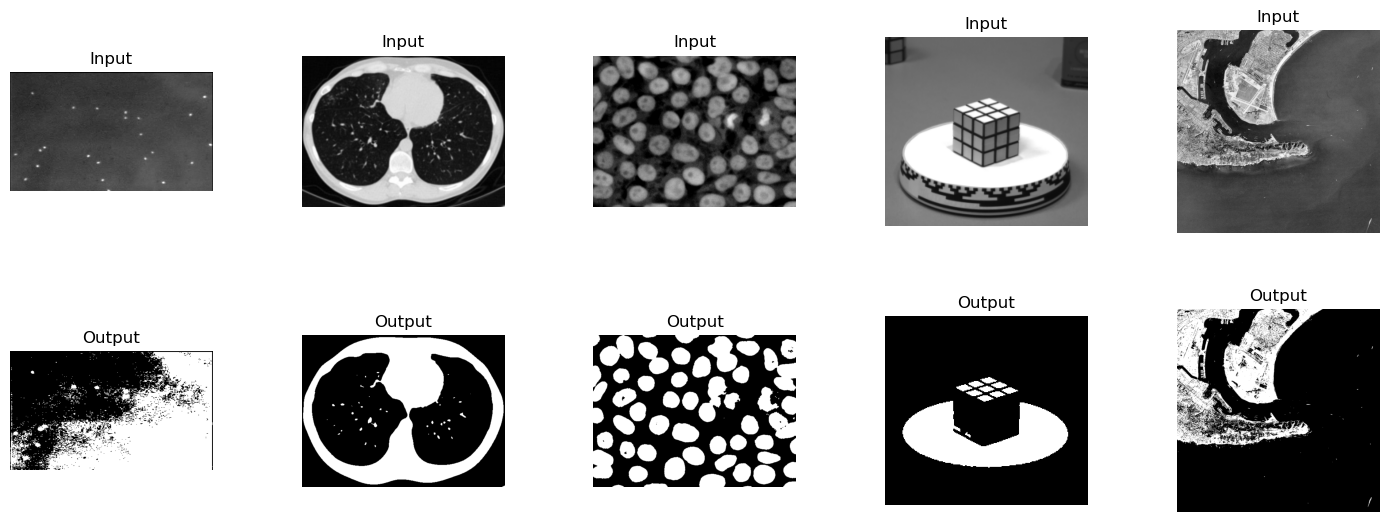

In [80]:
# Q2

import cv2
import numpy as np
import matplotlib.pyplot as plt

# Referenced form lecture "Image Processing Part 1" slides pages 17-18
def isodata_threshold(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # selecting arbitrary threshold
    th = np.random.randint(0, 256)

    while True:
        # Compute c1 and c2 with respect to the threshold
        c1 = gray[gray <= th]
        c2 = gray[gray > th]
        
        # Means         
        m1 = np.mean(c1)
        m2 = np.mean(c2)

        # Update the threshold to the mean of the means m1 + m1 /2
        new_th = int((m1 + m2) / 2)

        # Change
        if new_th == th:
            break

        th = new_th

    binary = np.zeros_like(gray, dtype=np.uint8)
    binary[gray <= th] = 0
    binary[gray > th] = 255

    return binary

# input image
paths = ['Algae.png', 'CT.png', 'Nuclei.png', 'Rubik.png', 'Satellite.png']
inputs = [cv2.imread(path) for path in paths]

outputs_iso = [isodata_threshold(image) for image in inputs]

# output display
fig, axs = plt.subplots(2, len(inputs), figsize=(15, 6))
fig.tight_layout(pad=3.0)

for i, (input_img, output_img) in enumerate(zip(inputs, outputs)):
    axs[0, i].imshow(cv2.cvtColor(input_img, cv2.COLOR_BGR2RGB))
    axs[0, i].set_title('Input')
    axs[0, i].axis('off')
    axs[1, i].imshow(output_img, cmap='gray')
    axs[1, i].set_title('Output')
    axs[1, i].axis('off')

plt.show()


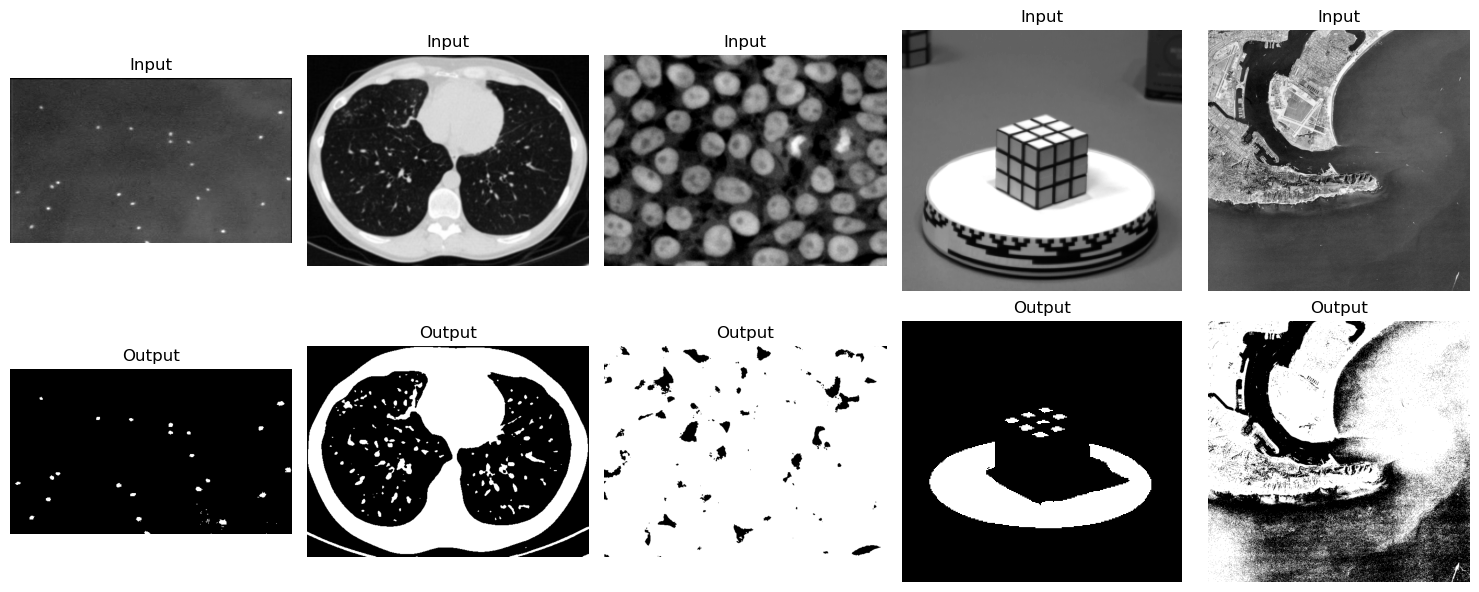

In [81]:
# Q3

import cv2
import numpy as np
import matplotlib.pyplot as plt

# Referenced form lecture "Image Processing Part 1" slides pages 30
def triangle_threshold(image):
    shape1, shape2 = image.shape

    count = [0] * 256
    min1 = -200
    min2 = -200
    
    i = 0
    while i < shape1:
        j = 0
        while j < shape2:
            pixval = image[i, j]
            count[pixval] += 1
            j += 1
        i += 1

    min1 = next(i for i in range(256) if count[i] > 0)
    min2 = next(j for j in range(255, -1, -1) if count[j] > 0)

    
    min2 = min(min2 + 1, 255)
    min1 = max(min1 - 1, 0)

    maximum = count.index(max(count))

    val1, val2 = maximum - min1, maximum - min2

    inversion = False
    rightval = -val2

    if val1 <= rightval:
        inversion = True
        min1, maximum = 255 - min2, 255 - maximum
        count.reverse()

    temp1, temp2 = count[maximum] * min1, (maximum - min1) * count[min1]

    threshold = 0 
    ans = -1000

    threshold_candidates = range(min1 + 1, maximum + 1)
    dist_values = [count[maximum] * i - (maximum - min1) * count[i] - (temp1 - temp2) for i in threshold_candidates]
    max_dist_index = max(range(len(dist_values)), key=lambda i: dist_values[i])
    threshold = threshold_candidates[max_dist_index]

    if inversion:
        threshold = 255 - threshold

    return threshold

# Load the image
image_paths = ['Algae.png', 'CT.png', 'Nuclei.png', 'Rubik.png', 'Satellite.png']
inputs = [cv2.imread(path, cv2.COLOR_BGR2GRAY) for path in image_paths]

outputs_triangle = [triangle_threshold(image) for image in inputs]
# fig, axs = plt.subplots(len(inputs), 2, figsize=(12, 6 * len(inputs)))
fig, axs = plt.subplots(2, len(inputs), figsize=(15, 6))
fig.tight_layout(pad=3.0)

for i, (image, output) in enumerate(zip(inputs, outputs_triangle)):
    axs[0, i].imshow(image, cmap='gray')
    axs[0, i].set_title('Input')
    axs[0, i].axis('off')
    axs[1, i].imshow(np.where(image > output, 255, 0), cmap='gray')
    axs[1, i].set_title('Output')
    axs[1, i].axis('off')

plt.tight_layout()
plt.show()


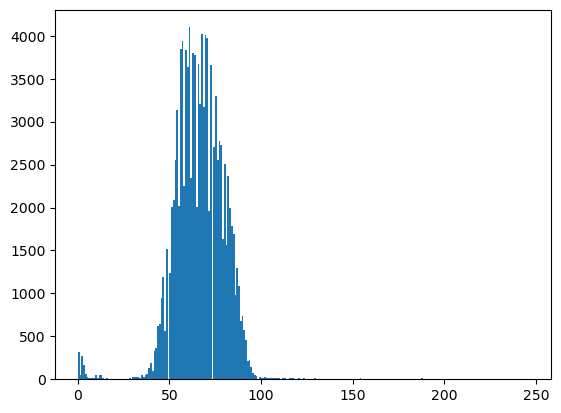

In [84]:
image1= cv2.imread("Algae.png",cv2.COLOR_BGR2GRAY)
hosto=cv2.calcHist([image1],[0],None,[256],[0,256])

plt.hist(image1.ravel(),256,[0,246])
plt.savefig('Algae_histo.png')
plt.show()

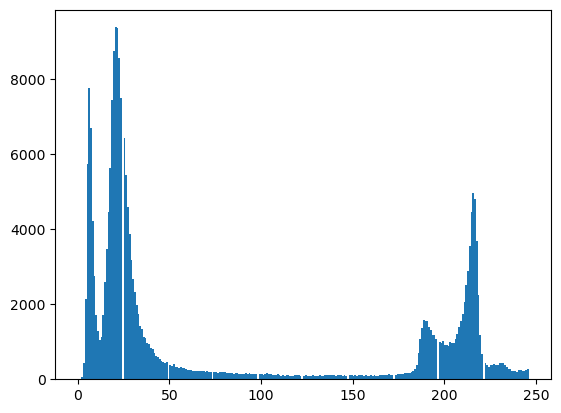

In [85]:
image1= cv2.imread("CT.png",cv2.COLOR_BGR2GRAY)
hosto=cv2.calcHist([image1],[0],None,[256],[0,256])

plt.hist(image1.ravel(),256,[0,246])
plt.savefig('CT_histo.png')
plt.show()

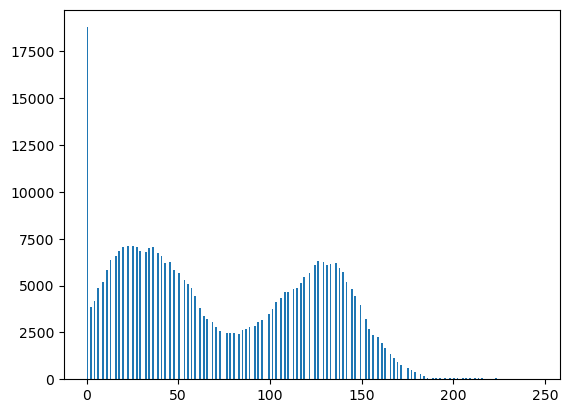

In [86]:
image1= cv2.imread("Nuclei.png",cv2.COLOR_BGR2GRAY)
hosto=cv2.calcHist([image1],[0],None,[256],[0,256])

plt.hist(image1.ravel(),256,[0,246])
plt.savefig('Nuclei_histo.png')
plt.show()

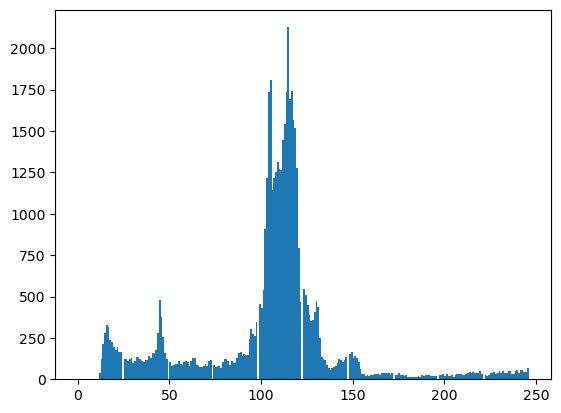

In [87]:
image1= cv2.imread("Rubik.png",cv2.COLOR_BGR2GRAY)
hosto=cv2.calcHist([image1],[0],None,[256],[0,256])

plt.hist(image1.ravel(),256,[0,246])
plt.savefig('Rubik_histo.png')
plt.show()

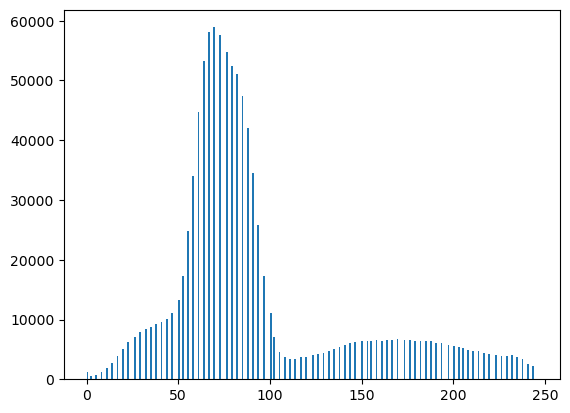

In [88]:
image1= cv2.imread("Satellite.png",cv2.COLOR_BGR2GRAY)
hosto=cv2.calcHist([image1],[0],None,[256],[0,256])

plt.hist(image1.ravel(),256,[0,246])
plt.savefig('Satellite_histo.png')
plt.show()